In [7]:
import pandas as pd
from pathlib import Path

# --- This code is now independent of PyCharm's settings ---

try:
    # Get the current working directory (which is likely the 'notebooks' folder)
    current_dir = Path.cwd()

    # The project root is one level up from the 'notebooks' folder
    project_root = current_dir.parent 

    # Build the full, correct path to the CSV file
    file_path = project_root / "data" / "consolidated_youbike_data.csv"
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Print the column names
    print("Successfully loaded the file!")
    print("\nThe columns in the CSV file are:")
    print(list(df.columns))
    
    # Print the first few rows to see the data structure
    print("\nHere are the first 5 rows:")
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file was not found. We tried to look for it at this path:")
    print(file_path)
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Successfully loaded the file!

The columns in the CSV file are:
['sno', 'total', 'available_rent_bikes', 'available_return_bikes', 'infoTime', 'sna', 'sarea', 'latitude', 'longitude', 'ar', 'sareaen', 'aren', 'act']

Here are the first 5 rows:
         sno  total  available_rent_bikes  available_return_bikes  \
0  500101001     28                     6                      22   
1  500101001     28                     3                      25   
2  500101001     28                     2                      26   
3  500101001     28                     0                      28   
4  500101001     28                     1                      27   

              infoTime                 sna sarea  latitude  longitude  \
0  2024-05-04 00:06:17  YouBike2.0_捷運科技大樓站   大安區  25.02605   121.5436   
1  2024-05-04 00:18:18  YouBike2.0_捷運科技大樓站   大安區  25.02605   121.5436   
2  2024-05-04 00:28:17  YouBike2.0_捷運科技大樓站   大安區  25.02605   121.5436   
3  2024-05-04 00:30:44  YouBike2.0_捷運科技大樓站   大安區 

In [10]:
# Build the full, correct path to the CSV file
weather_file_path = project_root / "data" / "taipei_songshan_weather.csv"
    
# Read the CSV file into a pandas DataFrame
weather_df = pd.read_csv(weather_file_path)
    
# Total number of entries in the weather DataFrame
total_entries = len(weather_df)

# Number of missing values in the 'wind_gust_kph' column
# Make sure to use the correct column name from your file, e.g., 'wind_gust_kph'
missing_values = weather_df['Wind Gust'].isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / total_entries) * 100

print(f"Total Weather Records: {total_entries:,}")
print(f"Missing 'Wind Gust' Records: {missing_values:,}")
print(f"Missing Percentage: {missing_percentage:.2f}%")

Total Weather Records: 19,799
Missing 'Wind Gust' Records: 19,272
Missing Percentage: 97.34%


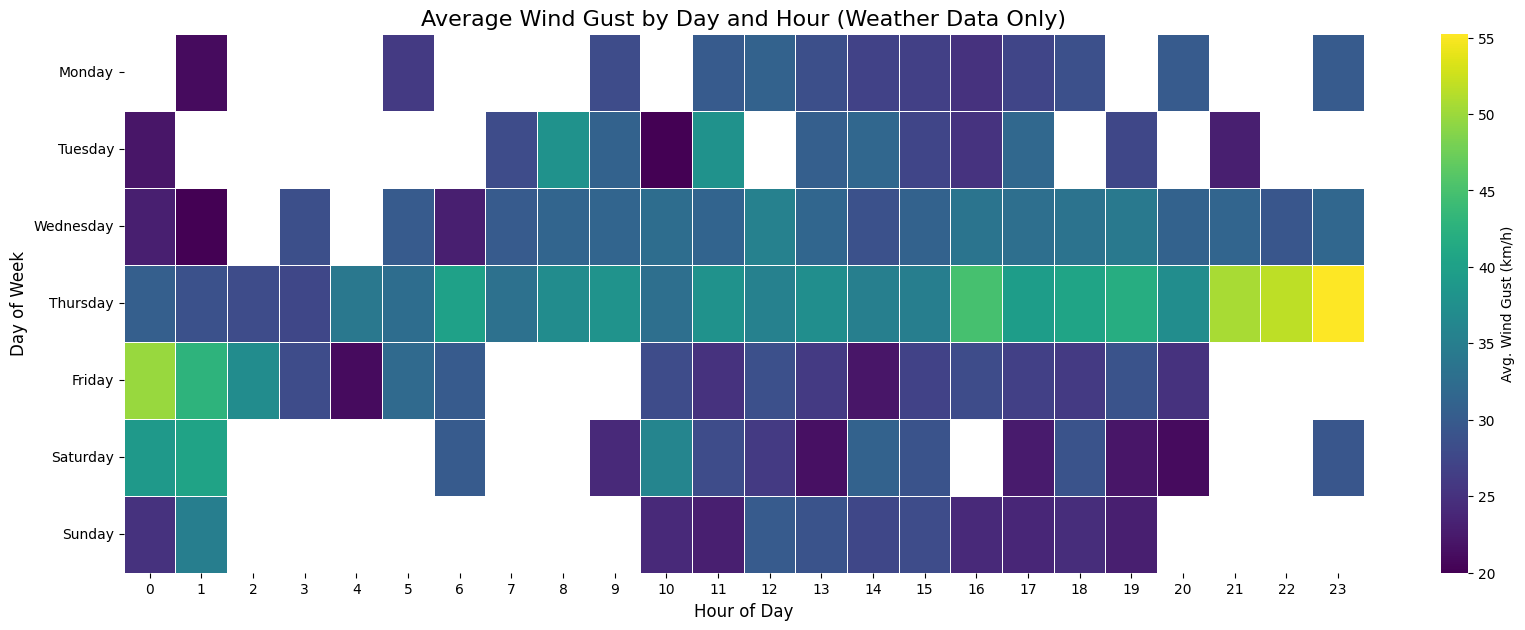

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure the 'datetime' column is a true datetime object and set it as the index
weather_df['Timestamp'] = pd.to_datetime(weather_df['Timestamp'])
weather_df.set_index('Timestamp', inplace=True)

# Create columns for day and hour directly from the index
weather_df['day_of_week'] = weather_df.index.day_name()
weather_df['hour_of_day'] = weather_df.index.hour

# Define the order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Pivot the data to create the matrix for the heatmap
heatmap_data = weather_df.pivot_table(
    values='Wind Gust',
    index='day_of_week',
    columns='hour_of_day'
).reindex(day_order)

# --- Plotting with Seaborn ---
plt.figure(figsize=(20, 7))

sns.heatmap(
    heatmap_data, 
    cmap='viridis',
    linewidths=.5,
    cbar_kws={'label': 'Avg. Wind Gust (km/h)'}
)

plt.title('Average Wind Gust by Day and Hour (Weather Data Only)', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

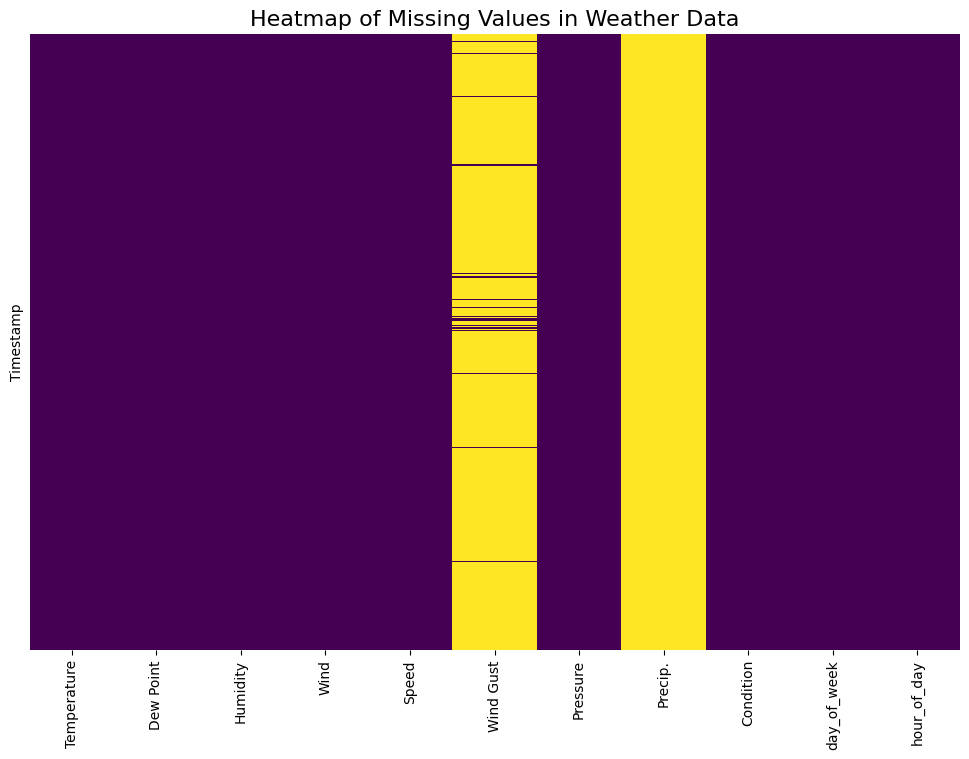

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'weather_df' is your DataFrame loaded from the weather CSV

# Set the size of the plot for a clear overview
plt.figure(figsize=(12, 8))

# Create the heatmap of the boolean mask of null values
# - weather_df.isnull() returns True for every cell that is null.
# - yticklabels=False is important because the plot would be unreadable with thousands of labels.
# - cbar=False removes the unnecessary color bar.
sns.heatmap(
    weather_df.isnull(), 
    yticklabels=False, 
    cbar=False, 
    cmap='viridis'
)

# Add a title
plt.title('Heatmap of Missing Values in Weather Data', fontsize=16)

# Display the plot
plt.show()